In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import networkx as nx

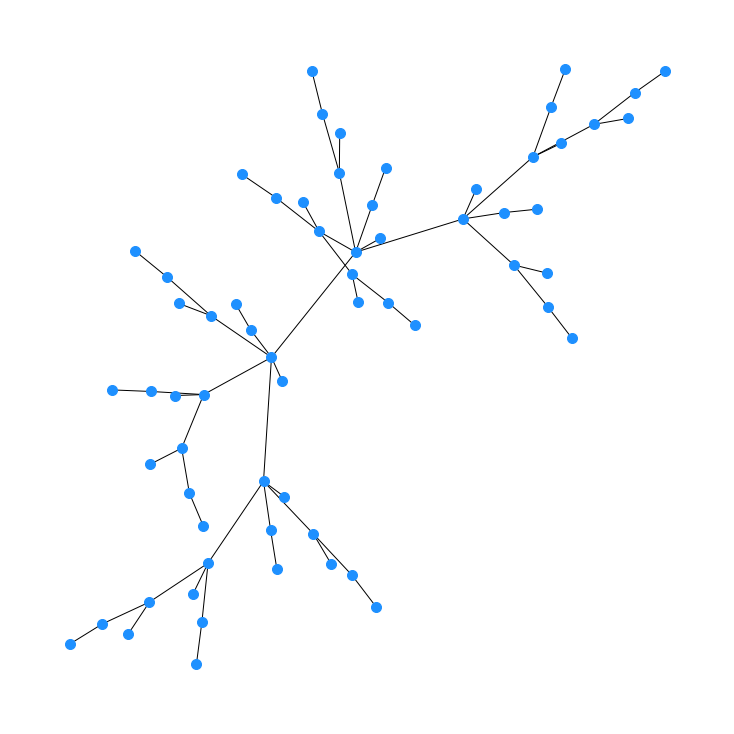

In [2]:
plt.figure(figsize=(10,10))
G = nx.binomial_tree(6)  # 5x5 grid
pos = nx.planar_layout(G, scale=2)
pos = nx.spring_layout(G, scale=2, seed=902, iterations=100)
nx.draw(G, pos, node_color = 'dodgerblue', node_size=100)
connect={}
coordinate = {}
nodes = []
for e in G.edges:
    connect[e]=1
    nodes.append(e[0])
    nodes.append(e[1])
    
nodes= list(set(nodes))
N= len(nodes)
for n in G.nodes:
    coordinate[n,'X']=pos[n][0]
    coordinate[n,'Y']=pos[n][1]
plt.savefig('base_graph'+  ' .png', format='png', dpi=400)
plt.show()


In [3]:
M = 100
model = AbstractModel()
model.i = RangeSet(N)
model.j = Set(initialize=model.i)
model.flow = Var(model.i,model.j, bounds= (0,1),initialize = 0 , within=NonNegativeReals)
model.G = Var(model.i,bounds=(0,1), within=Reals)
model.D = Var(model.i,bounds=(0,1), within=Reals)
def rule_C1(model,i):
    return model.G[i]- model.D[i]/N == sum( model.flow[i,j] - model.flow[j,i] for j in model.j if (i-1,j-1) in connect or (j-1,i-1) in connect )
model.C1 = Constraint(model.i, rule=rule_C1)
    
def rule_OF(model):
    return sum((i+1)*model.G[i]-model.D[i]*M for i in model.i) 
model.obj = Objective(rule= rule_OF, sense=minimize)

opt = SolverFactory('cbc')
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)  
print(value(instance.obj))

feasible
-6398.0


In [4]:
A=[a for a in connect.keys()]
removed=[]
print(len(A))
for i in range(7):
    index= random.randint(1,len(A)-1)
    print(A[index])
    instance.flow[A[index][0]+1,A[index][1]+1].fix(0)
    instance.flow[A[index][1]+1,A[index][0]+1].fix(0)

    removed.append(A[index])

63
(40, 42)
(30, 31)
(20, 22)
(12, 13)
(30, 31)
(28, 30)
(28, 29)


In [5]:
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)  
print(value(instance.obj))

feasible
-6394.390625


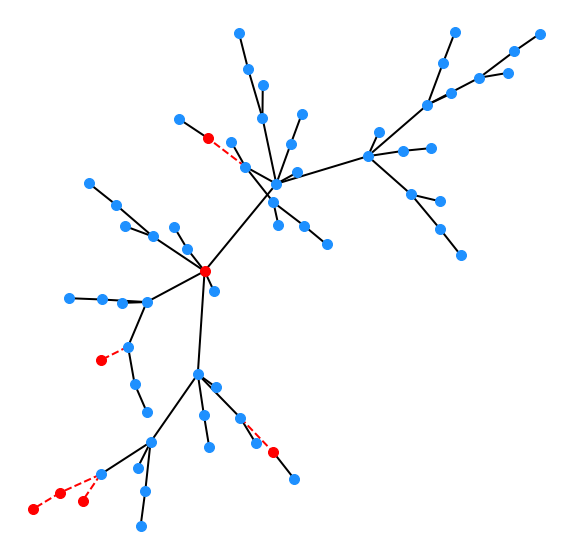

In [6]:
plt.figure(figsize=(10,10))
for (f,t) in connect:
    x1= coordinate[f,'X']
    y1= coordinate[f,'Y']
    x2= coordinate[t,'X']
    y2= coordinate[t,'Y']
    if (f,t) not in removed:        
        #plt.scatter(x1,y1,s=10, c='r', zorder= 2)
        plt.plot([x1,x2],[y1,y2],lw=2, c= 'k', zorder= -1)
    else:
        plt.plot([x1,x2],[y1,y2], 'ro--',lw=2, zorder= -1)
for i in instance.i:
    x1= coordinate[i-1,'X']
    y1= coordinate[i-1,'Y']
    if value(instance.G[i])>0:
        plt.scatter(x1,y1,s=100, c='r', zorder= 2)
    else:
        plt.scatter(x1,y1,s=100, c='dodgerblue', zorder= 2)
        
plt.axis('off')
plt.savefig('result'+  ' .png', format='png', dpi=400)
